# Multiclass Classification

In [637]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.naive_bayes  import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix,ConfusionMatrixDisplay
from itertools import cycle
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [638]:
# Read The dataset
data_df = pd.read_csv('online_gaming_behavior_dataset.csv')
data_df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [639]:
data_df ['EngagementLevel'].value_counts()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

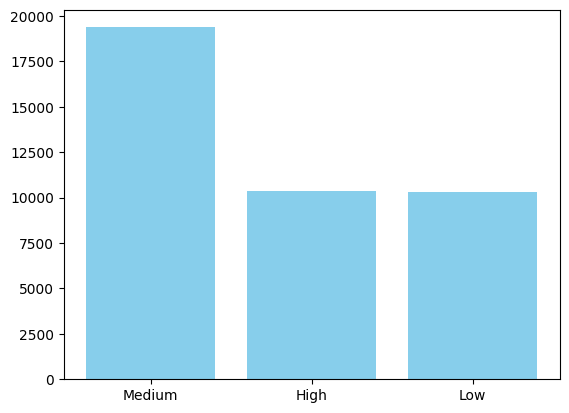

In [640]:
value_counts = data_df['EngagementLevel'].value_counts()
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.show()


In [641]:
data_df.shape

(40034, 13)

In [642]:
data_df.isna().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [643]:
data_df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [644]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [645]:
data_df = data_df.drop(columns=['PlayerID'])

In [646]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   Gender                     40034 non-null  object 
 2   Location                   40034 non-null  object 
 3   GameGenre                  40034 non-null  object 
 4   PlayTimeHours              40034 non-null  float64
 5   InGamePurchases            40034 non-null  int64  
 6   GameDifficulty             40034 non-null  object 
 7   SessionsPerWeek            40034 non-null  int64  
 8   AvgSessionDurationMinutes  40034 non-null  int64  
 9   PlayerLevel                40034 non-null  int64  
 10  AchievementsUnlocked       40034 non-null  int64  
 11  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.7+ MB


In [647]:
# check Duplicates
data_df.duplicated().sum()

0

In [648]:
data_df.describe()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [649]:
# Assign the Independent and dependent variables

x = data_df.iloc[:,:-1] # Apart from Engagement Level
y = data_df.iloc[:,-1] # only Engagement Level


In [650]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   Gender                     40034 non-null  object 
 2   Location                   40034 non-null  object 
 3   GameGenre                  40034 non-null  object 
 4   PlayTimeHours              40034 non-null  float64
 5   InGamePurchases            40034 non-null  int64  
 6   GameDifficulty             40034 non-null  object 
 7   SessionsPerWeek            40034 non-null  int64  
 8   AvgSessionDurationMinutes  40034 non-null  int64  
 9   PlayerLevel                40034 non-null  int64  
 10  AchievementsUnlocked       40034 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 3.4+ MB


In [651]:
# The data set is containing the Categorical data to train the model we have to conver to them to continuious by using LabelEncoder
# The categorical columns are

print (f'The Gender column have unique counts are {data_df['Gender'].nunique()}')
print (f'The Location column have unique counts are {data_df['Location'].nunique()}')
print (f'The GameGenre column have unique counts are {data_df['GameGenre'].nunique()}')
print (f'The GameDifficulty column have unique counts are {data_df['GameDifficulty'].nunique()}')

The Gender column have unique counts are 2
The Location column have unique counts are 4
The GameGenre column have unique counts are 5
The GameDifficulty column have unique counts are 3


In [652]:
# now use lable encoding
# create an Object of the LableEncoder class to use the same

Le = LabelEncoder()
for i in x.select_dtypes('object').columns:
    x[i] = Le.fit_transform(x[i])


In [653]:
x.info() # all the data converted to the int / float by using the lable encoding 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   Gender                     40034 non-null  int32  
 2   Location                   40034 non-null  int32  
 3   GameGenre                  40034 non-null  int32  
 4   PlayTimeHours              40034 non-null  float64
 5   InGamePurchases            40034 non-null  int64  
 6   GameDifficulty             40034 non-null  int32  
 7   SessionsPerWeek            40034 non-null  int64  
 8   AvgSessionDurationMinutes  40034 non-null  int64  
 9   PlayerLevel                40034 non-null  int64  
 10  AchievementsUnlocked       40034 non-null  int64  
dtypes: float64(1), int32(4), int64(6)
memory usage: 2.7 MB


In [654]:
x.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,43,1,2,4,16.271119,0,2,6,108,79,25
1,29,0,3,4,5.525961,0,2,5,144,11,10
2,22,0,3,3,8.223755,0,0,16,142,35,41
3,35,1,3,0,5.265351,1,0,9,85,57,47
4,33,1,1,0,15.531945,0,2,2,131,95,37


In [655]:
# now trained the Model

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42 , test_size = 0.3)

In [656]:
print (f'X Training shape: {x_train.shape}')
print (f'X Test shape: {x_test.shape}')
print (f'Y Training shape: {y_train.shape}')
print (f'Y Test shape: {y_test.shape}')


X Training shape: (28023, 11)
X Test shape: (12011, 11)
Y Training shape: (28023,)
Y Test shape: (12011,)


In [657]:
x_train.describe()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,28023.000000,28023.000000,28023.000000,28023.000000,28023.000000,28023.000000,28023.000000,28023.000000,28023.000000,28023.000000,28023.000000
mean,31.967277,0.598187,1.694715,1.998180,11.993370,0.199907,0.800450,9.456161,94.747957,49.800628,24.517396
std,10.022712,0.490273,1.189090,1.412988,6.924546,0.399938,0.871767,5.764388,48.996166,28.667786,14.434613
min,15.000000,0.000000,0.000000,0.000000,0.000115,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000
25%,23.000000,0.000000,1.000000,1.000000,6.020258,0.000000,0.000000,4.000000,53.000000,25.000000,12.000000
50%,32.000000,1.000000,1.000000,2.000000,11.969058,0.000000,1.000000,9.000000,95.000000,50.000000,25.000000
75%,41.000000,1.000000,3.000000,3.000000,17.937843,0.000000,2.000000,14.000000,138.000000,74.000000,37.000000
max,49.000000,1.000000,3.000000,4.000000,23.997838,1.000000,2.000000,19.000000,179.000000,99.000000,49.000000


In [658]:
# The Data is normally distributed but the standardlization is required
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)


In [659]:
pd.DataFrame(x_train_sc).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.701691,0.819584,-0.584251,0.709021,1.560229,-0.499855,-0.918208,0.961756,1.556314,-0.586056,0.726226
1,1.100792,-1.220132,-0.584251,-1.414177,-1.237666,-0.499855,-0.918208,0.094346,-0.137727,1.646455,0.171993
2,1.499893,0.819584,1.097737,0.001288,-1.436744,2.000580,-0.918208,0.267828,-1.178643,-0.690705,-1.698545
3,0.302590,0.819584,-0.584251,-0.706445,1.351197,-0.499855,0.228907,-1.640474,-0.137727,0.983678,0.033434
4,-0.794936,-1.220132,-1.425246,0.709021,0.451337,-0.499855,1.376023,-1.640474,1.617544,-0.237226,-0.659357


In [660]:
pd.DataFrame(x_test_sc).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.699443,0.819584,0.256743,-1.414177,-1.251579,2.000580,1.376023,1.135239,-0.647980,-0.237226,-1.282870
1,-0.296061,-1.220132,1.097737,-1.414177,1.102344,-0.499855,0.228907,0.094346,0.086785,-0.062811,-0.936474
2,0.003265,0.819584,-1.425246,0.709021,1.636052,-0.499855,1.376023,0.267828,-1.586845,-1.318599,0.656947
3,1.699443,0.819584,-1.425246,-1.414177,-0.237504,-0.499855,1.376023,-0.426100,1.107291,-0.202343,0.934063
4,1.599668,-1.220132,0.256743,0.001288,-0.831063,-0.499855,-0.918208,0.094346,0.658268,-1.248833,-1.421428


In [661]:
pd.DataFrame(x_train_sc).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,2.802300e+04,2.802300e+04,2.802300e+04,2.802300e+04,2.802300e+04,2.802300e+04,2.802300e+04,2.802300e+04,2.802300e+04,2.802300e+04,2.802300e+04
mean,-2.611637e-17,-7.872944e-17,3.042684e-17,-1.267785e-18,1.613890e-16,2.839838e-17,-4.665449e-17,-8.215246e-17,-1.075082e-16,-7.175663e-17,3.549798e-18
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-1.692913e+00,-1.220132e+00,-1.425246e+00,-1.414177e+00,-1.732023e+00,-4.998550e-01,-9.182081e-01,-1.640474e+00,-1.729716e+00,-1.702311e+00,-1.698545e+00
25%,-8.947116e-01,-1.220132e+00,-5.842514e-01,-7.064447e-01,-8.626152e-01,-4.998550e-01,-9.182081e-01,-9.465459e-01,-8.520810e-01,-8.651198e-01,-8.671947e-01
50%,3.264955e-03,8.195837e-01,-5.842514e-01,1.288027e-03,-3.511070e-03,-4.998550e-01,2.289073e-01,-7.913574e-02,5.144228e-03,6.954688e-03,3.343437e-02
75%,9.012416e-01,8.195837e-01,1.097737e+00,7.090207e-01,8.584792e-01,-4.998550e-01,1.376023e+00,7.882744e-01,8.827796e-01,8.441462e-01,8.647843e-01
max,1.699443e+00,8.195837e-01,1.097737e+00,1.416753e+00,1.733642e+00,2.000580e+00,1.376023e+00,1.655685e+00,1.719595e+00,1.716221e+00,1.696134e+00


In [662]:
pd.DataFrame(x_test_sc).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000
mean,0.008399,0.001897,0.001945,0.006768,0.014920,0.007893,-0.001452,0.009028,0.003013,-0.016866,0.002097
std,1.006841,0.999660,1.001992,1.005796,0.995204,1.005916,1.000143,0.999614,1.001091,0.990696,0.999160
min,-1.692913,-1.220132,-1.425246,-1.414177,-1.731948,-0.499855,-0.918208,-1.640474,-1.729716,-1.702311,-1.698545
25%,-0.894712,-1.220132,-0.584251,-0.706445,-0.844165,-0.499855,-0.918208,-0.773064,-0.872491,-0.865120,-0.867195
50%,0.003265,0.819584,-0.584251,0.001288,0.018727,-0.499855,-0.918208,-0.079136,0.025554,-0.027928,0.033434
75%,0.901242,0.819584,1.097737,0.709021,0.877470,-0.499855,1.376023,0.961756,0.862369,0.844146,0.864784
max,1.699443,0.819584,1.097737,1.416753,1.733895,2.000580,1.376023,1.655685,1.719595,1.716221,1.696134


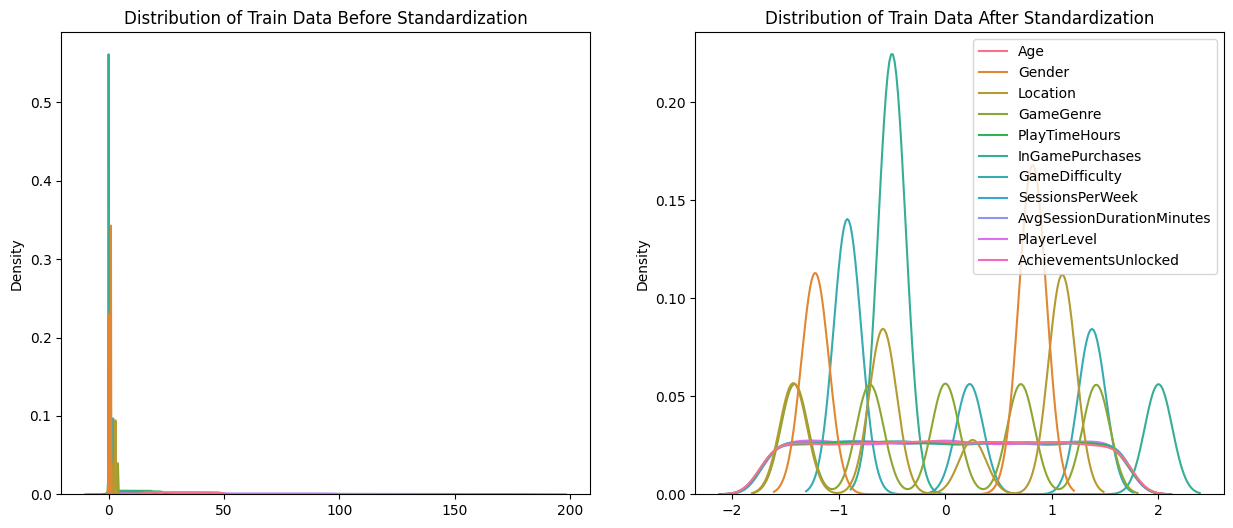

In [663]:
plt.figure(figsize =  (15, 6))
plt.subplot(1,2,1)
plt.title('Distribution of Train Data Before Standardization')
sns.kdeplot(x_train, legend = False)

plt.subplot(1,2,2)
plt.title('Distribution of Train Data After Standardization')
sns.kdeplot(pd.DataFrame(x_train_sc, columns = x_train.columns),legend = True)
plt.show()



In [664]:
pd.DataFrame(x_train_sc).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28023 entries, 0 to 28022
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       28023 non-null  float64
 1   1       28023 non-null  float64
 2   2       28023 non-null  float64
 3   3       28023 non-null  float64
 4   4       28023 non-null  float64
 5   5       28023 non-null  float64
 6   6       28023 non-null  float64
 7   7       28023 non-null  float64
 8   8       28023 non-null  float64
 9   9       28023 non-null  float64
 10  10      28023 non-null  float64
dtypes: float64(11)
memory usage: 2.4 MB


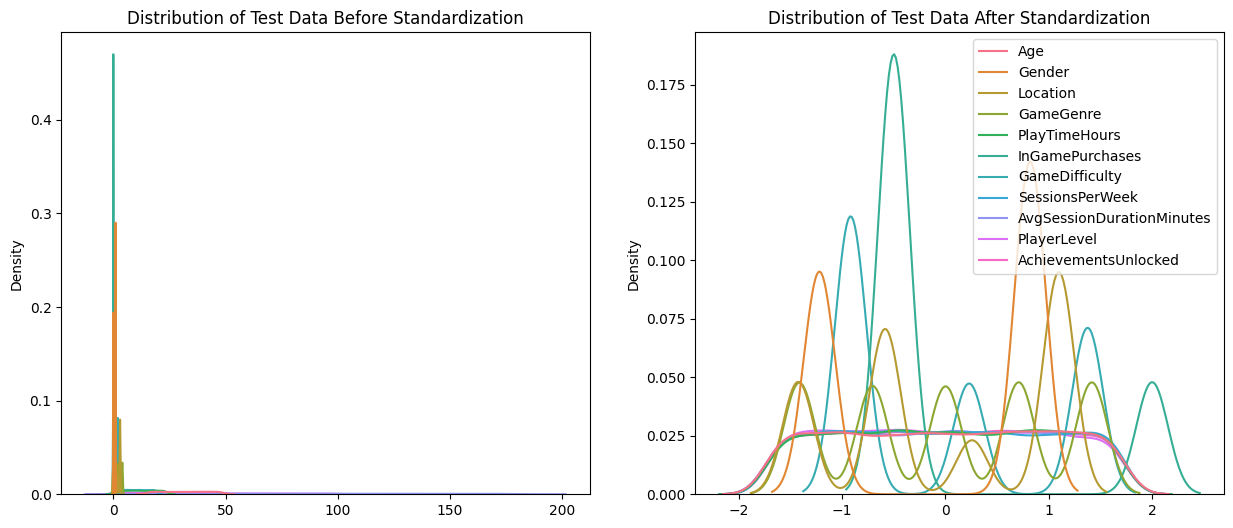

In [665]:
plt.figure(figsize =  (15, 6))
plt.subplot(1,2,1)
plt.title('Distribution of Test Data Before Standardization')
sns.kdeplot(x_test, legend = False)

plt.subplot(1,2,2)
plt.title('Distribution of Test Data After Standardization')
sns.kdeplot(pd.DataFrame(x_test_sc, columns = x_test.columns),legend = True)
plt.show()

In [ ]:
# Now Upload the trained data to Models for prediction

Model_Names = [LogisticRegression() ,GaussianNB(), KNeighborsClassifier(n_neighbors = 7), DecisionTreeClassifier(random_state = 42)]

In [ ]:
def Prediction_models(model,x_train_sc, x_test_sc, y_train, y_test):
    
    print(f'Results for {model}')
    print('-' * 40)
    
    
    pipeline =  Pipeline([
    ('impute',SimpleImputer(strategy = 'median')), 
    ('stdsc', StandardScaler()), 
    ('log_reg', model)
    ])

    pipeline.fit(x_train_sc,y_train)
    y_pred_train = pipeline.predict(x_train_sc)
    y_pred_test = pipeline.predict(x_test_sc)

    ## Predict probabilities on test set
    y_pred_test_prob =  pipeline.predict_proba(x_test_sc)
    
    results_df = pd.DataFrame({
    'Actual Label': y_pred_test, 
    'Predicted Label' : y_pred_test, 
    'Predicted Probability(Class 1)' :  y_pred_test_prob[:, 1]
    })
    print(results_df.head(10))

    train_accuracy =  accuracy_score(y_train, y_pred_train)
    test_accuracy =  accuracy_score(y_test, y_pred_test)

    print('_'*50)
    print('Logistic Regression')
    print(f'Training Accuracy : {train_accuracy * 100:.2f}%')
    print(f'Testing Accuracy : {test_accuracy * 100:.2f}%')
    

    conf_mat = confusion_matrix(y_test, y_pred_test)
    cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat )
    cm_display.plot(colorbar= False)
    plt.show()
    class_report =  classification_report(y_test, y_pred_test)
    print(class_report)
    
    class_order =  model.classes_
    print(f'Class Order {class_order}')


    if len(set(y_test))>1:
        y_test_binarize = label_binarize(y_test, classes = class_order)
        n_classes =  y_test_binarize.shape[1]
        fpr = {}
        tpr = {}
        roc_auc ={}
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_pred_test_prob[:, i])
            roc_auc[i] = roc_auc_score(y_test_binarize[:, i], y_pred_test_prob[:, i])
        plt.figure()
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color = color, lw = 2, label = f'ROC Curve for class {i} (Area = {roc_auc[i]:.3f})')
        plt.plot([0,1], [0,1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model}')
        plt.legend()
        plt.show()
    else:
        print('ROC AUC Score is not defined as only one class is present')


In [ ]:
for model in Model_Names:
    Prediction_models(model,x_train_sc,x_test_sc,y_train,y_test)

Results for LogisticRegression()
----------------------------------------
  Actual Label Predicted Label  Predicted Probability(Class 1)
0       Medium          Medium                        0.041537
1       Medium          Medium                        0.118955
2       Medium          Medium                        0.445977
3       Medium          Medium                        0.045391
4       Medium          Medium                        0.082450
5         High            High                        0.001581
6          Low             Low                        0.771726
7       Medium          Medium                        0.007372
8         High            High                        0.000753
9          Low             Low                        0.793591
__________________________________________________
Logistic Regression
Training Accuracy : 82.59%
Testing Accuracy : 82.04%


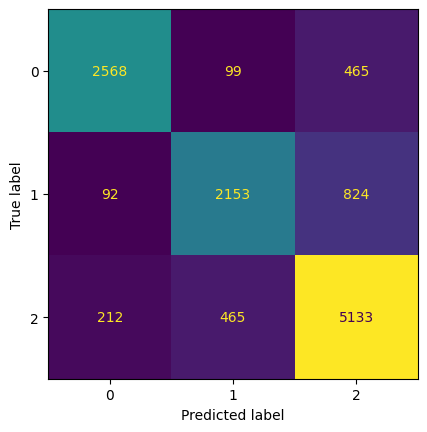

              precision    recall  f1-score   support

        High       0.89      0.82      0.86      3132
         Low       0.79      0.70      0.74      3069
      Medium       0.80      0.88      0.84      5810

    accuracy                           0.82     12011
   macro avg       0.83      0.80      0.81     12011
weighted avg       0.82      0.82      0.82     12011

Class Order ['High' 'Low' 'Medium']


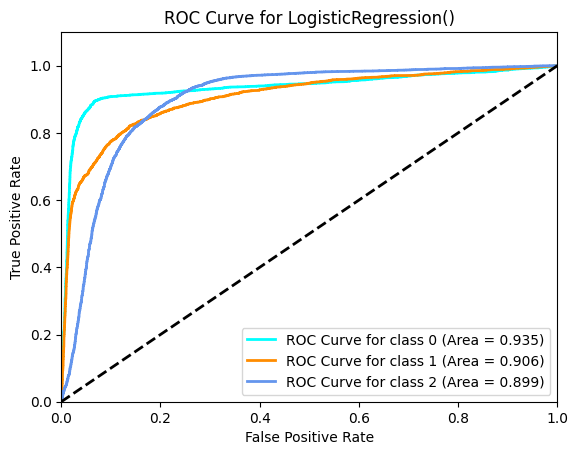

In [ ]:
Prediction_models(LogisticRegression(),x_train_sc,x_test_sc,y_train,y_test)

Results for GaussianNB()
----------------------------------------
  Actual Label Predicted Label  Predicted Probability(Class 1)
0       Medium          Medium                        0.072138
1       Medium          Medium                        0.167372
2       Medium          Medium                        0.339568
3       Medium          Medium                        0.155627
4       Medium          Medium                        0.134952
5         High            High                        0.032347
6          Low             Low                        0.586281
7       Medium          Medium                        0.030522
8         High            High                        0.023161
9          Low             Low                        0.605028
__________________________________________________
Logistic Regression
Training Accuracy : 84.54%
Testing Accuracy : 83.85%


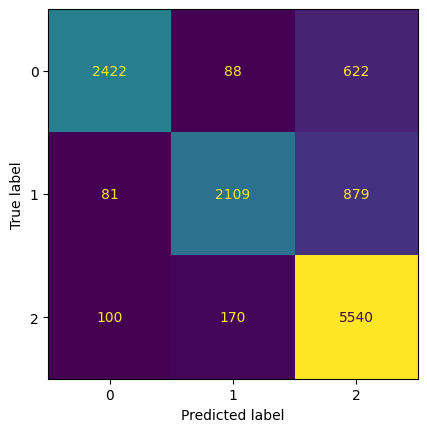

              precision    recall  f1-score   support

        High       0.93      0.77      0.84      3132
         Low       0.89      0.69      0.78      3069
      Medium       0.79      0.95      0.86      5810

    accuracy                           0.84     12011
   macro avg       0.87      0.80      0.83     12011
weighted avg       0.85      0.84      0.84     12011

Class Order ['High' 'Low' 'Medium']


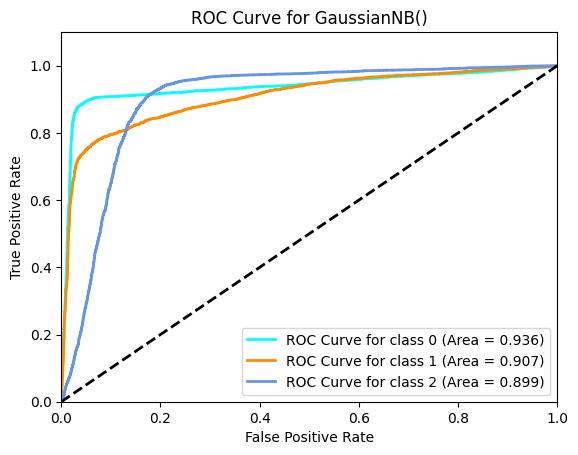

In [678]:
Prediction_models(GaussianNB(),x_train_sc,x_test_sc,y_train,y_test)

Results for KNeighborsClassifier(n_neighbors=10)
----------------------------------------
  Actual Label Predicted Label  Predicted Probability(Class 1)
0       Medium          Medium                             0.0
1         High            High                             0.2
2       Medium          Medium                             0.4
3       Medium          Medium                             0.0
4       Medium          Medium                             0.0
5         High            High                             0.0
6          Low             Low                             0.9
7         High            High                             0.1
8         High            High                             0.0
9          Low             Low                             0.6
__________________________________________________
Logistic Regression
Training Accuracy : 84.18%
Testing Accuracy : 78.71%


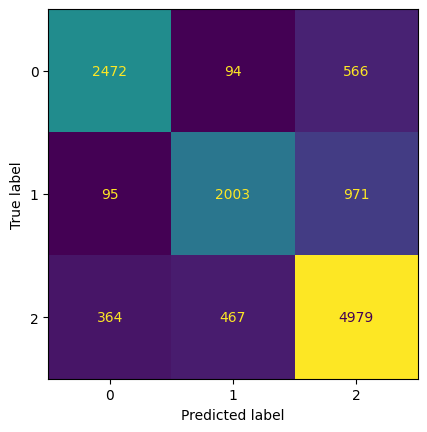

              precision    recall  f1-score   support

        High       0.84      0.79      0.82      3132
         Low       0.78      0.65      0.71      3069
      Medium       0.76      0.86      0.81      5810

    accuracy                           0.79     12011
   macro avg       0.80      0.77      0.78     12011
weighted avg       0.79      0.79      0.79     12011

Class Order ['High' 'Low' 'Medium']


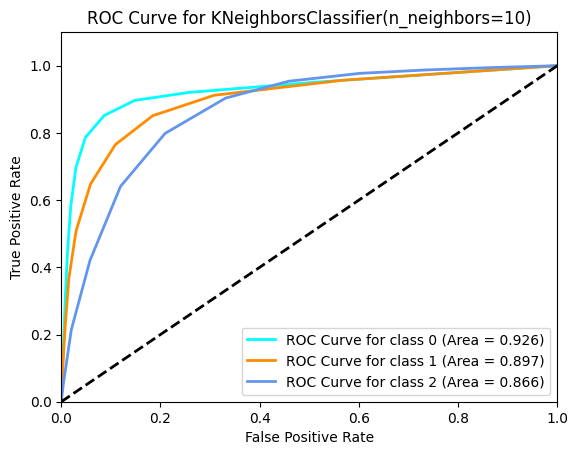

In [680]:
Prediction_models(KNeighborsClassifier(n_neighbors = 10),x_train_sc,x_test_sc,y_train,y_test)

Results for DecisionTreeClassifier(max_depth=3, random_state=42)
----------------------------------------
  Actual Label Predicted Label  Predicted Probability(Class 1)
0       Medium          Medium                        0.179089
1         High            High                        0.029671
2          Low             Low                        0.703203
3       Medium          Medium                        0.039665
4         High            High                        0.029671
5         High            High                        0.029671
6          Low             Low                        0.703203
7       Medium          Medium                        0.179089
8         High            High                        0.029671
9       Medium          Medium                        0.179089
__________________________________________________
Logistic Regression
Training Accuracy : 80.50%
Testing Accuracy : 79.60%


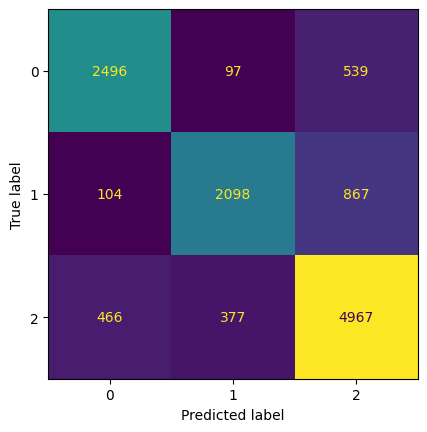

              precision    recall  f1-score   support

        High       0.81      0.80      0.81      3132
         Low       0.82      0.68      0.74      3069
      Medium       0.78      0.85      0.82      5810

    accuracy                           0.80     12011
   macro avg       0.80      0.78      0.79     12011
weighted avg       0.80      0.80      0.79     12011

Class Order ['High' 'Low' 'Medium']


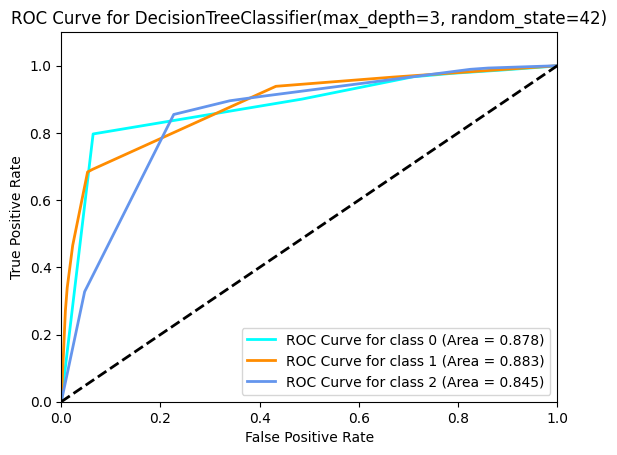

In [681]:
Prediction_models(DecisionTreeClassifier(random_state = 42,max_depth=3),x_train_sc,x_test_sc,y_train,y_test)

In [ ]:
# Using hyperameter tunning for model evaluation

# Multi Label Classification


it allows us to classify datasets with more than 1 target variable. one input may belong to more than one categories.
Examples:
- Text Categorization
- Image Taggging
- Medical Diagnosis
- Music/Video Genre Classification

In [669]:
# in Linear Regression every thing should be on the Continous data
# in Logistic you can predict the Categorical data